In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import anndata as ad
from plotnine import ggplot, aes, geom_point, geom_abline, facet_wrap, theme_light, coord_fixed

from IPython.display import display

import utils
from dnam_preprocessing import get_targeted_dnam, show_ad, get_ages

ad10_all, ad100_all, ad10, ad100, df_testset, ages_testset = get_targeted_dnam()
print(ad100)
show_ad(ad100)
ages_cpg_sorted = get_ages(ad100)
groups = np.array(ad100.var['Tank'])

View of AnnData object with n_obs × n_vars = 6183 × 192
    obs: 'Site', 'CHR', 'BP', 'spearman', 'spearman_p', 'pearson', 'pearson_p', 'is_genetic'
    var: 'Unique Frog ID', 'DOB', 'Sampled Date', 'Age (days)', 'Age (months)', 'Age (years)', 'Is tadpole?', 'Tank', 'Strain', 'Has TBSeq data?', 'Lane', 'i7 Index', 'i7(?) Index Sequence', 'i5 Index', 'i5(?) Index Sequence', ' Total Number of Reads per Sample  ', 'Expected Number of Reads Per Sample', 'Run ', 'Run Type', 'Library Prep'


,1-Tadpole,2-Tadpole,4-Tadpole,14-Tadpole,15-Tadpole,165,166,167,168,169,...,55,56,57,58,59,60,spearman,spearman_p,pearson,pearson_p
Site,,,,,,,,,,,,,,,,,,,,,
Chr3:36676488,0.850811,0.832653,0.865186,0.671875,0.630435,0.462415,0.568493,0.631272,0.665066,0.562555,...,0.393812,0.449210,0.403297,0.393574,0.369246,0.427812,-0.781450,8.881552e-41,-0.731940,1.730722e-33
Chr6:88833379,0.938825,0.954813,0.949430,0.901774,0.923618,0.905103,0.886076,0.876698,0.905274,0.884397,...,0.819978,0.811918,0.811525,0.843700,0.824652,0.803440,-0.775371,8.764715e-40,-0.685669,5.230109e-28
Chr1:33277155,0.901961,0.905660,0.907588,0.874060,0.868347,0.809961,0.830443,0.860051,0.828927,0.828671,...,0.538226,0.467033,0.446790,0.453074,0.515050,0.523543,-0.761119,1.432265e-37,-0.715501,2.041906e-31
Chr3:53115546,0.813627,0.835329,0.814458,0.575758,0.597938,0.577381,0.593525,0.608414,0.674699,0.661017,...,0.326633,0.484581,0.398496,0.446154,0.413655,0.395928,-0.750174,5.667807e-36,-0.703630,5.215887e-30
Chr1:32298887,0.808411,0.794286,0.819599,0.672365,0.696429,0.682119,0.658933,0.669516,0.671875,0.631793,...,0.516129,0.513846,0.470085,0.492063,0.558904,0.568571,-0.744839,3.178313e-35,-0.699781,1.440906e-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chr8:36144539,0.827423,0.749235,0.780549,0.832487,0.833333,0.835821,0.852941,0.856589,0.851282,0.876081,...,0.911917,0.856410,0.876404,0.810345,0.841040,0.923596,0.000346,9.962011e-01,0.046742,5.197024e-01
Chr7:66888395,0.918317,0.917910,0.957655,0.937198,0.936508,0.927757,0.913420,0.924460,0.924901,0.945344,...,0.945876,0.951542,0.918987,0.916300,0.946092,0.953659,0.000203,9.977692e-01,0.039903,5.826515e-01
Chr6:100540884,0.923077,0.917808,0.956633,0.933014,0.948276,0.956656,0.959677,0.948127,0.950000,0.972540,...,0.960212,0.985507,0.969780,0.977778,0.967337,0.951282,-0.000203,9.977739e-01,0.033287,6.467004e-01


X_train.shape (192, 6183) y_train.shape (192,)
X_train_adapted.shape (192, 5938) y_train_adapted.shape (192,)
X_test.shape (16, 5938) y_test.shape (16,)


192it [14:21,  4.49s/it]


[ 0.45243073  1.26925468 -1.22655106  1.56716919  0.5580101  -0.01426601
  0.51506424  0.4705677  -0.19101334  0.8229084   0.47015953  0.79866123
  1.1143589   1.02917576  0.84013176  1.3348341   0.70311928  0.0851965
  1.21195316 -0.03551197  0.93109131  0.93710327  0.84646225  0.8481617
  1.53454399  2.17160225  2.2700491   1.6278038   0.96765137  0.22722626
  1.56247711  0.8128376   1.98162556  2.1632452   0.4222126   1.24663353
  5.01876259  1.36226654  1.30751419  1.23659897  1.4611702   1.29232216
  1.76057625  1.89041328  2.32886219  2.65969658  2.17724419  2.61070538
  1.77672577  2.30100727  2.82794571  2.18656731  1.65280437  2.3637886
  1.94345188  1.85631752  2.54578209  2.8048439   2.1518774   3.13225174
  2.44415092  2.14827442  3.17468452  3.06489086  1.6760006   1.66065979
  3.33504772  1.56394768  4.28543568  2.71247005  2.48228359  3.90263176
  1.96479511  1.39134216  1.98761845  2.3289566   2.18840408  3.60701942
  2.64435577  3.19618988  3.74234629  1.96360588  2.78

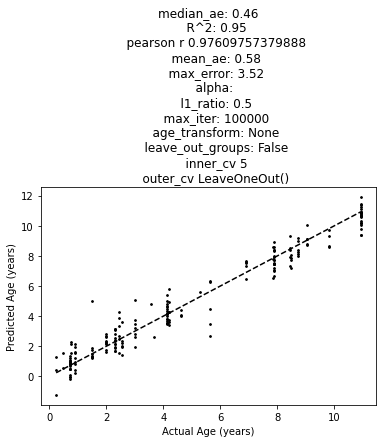

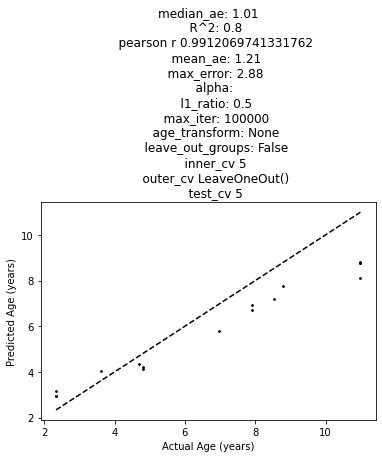

In [2]:
predictions_loo, predictions_loo_test, lm_loo, test_lm_loo = utils.clock(ad100.to_df(), ages_cpg_sorted, 
                                                                        df_testset, ages_testset, L1R=0.5, 
                                                                        MAX_ITER=100000)

X_train.shape (192, 6183) y_train.shape (192,)
X_train_adapted.shape (192, 5938) y_train_adapted.shape (192,)
X_test.shape (16, 5938) y_test.shape (16,)


192it [14:29,  4.53s/it]


[-1.3456316  -1.12737751 -1.69009256 -0.25558281 -0.16630793 -0.44392133
 -0.18671632 -0.26754117 -0.5245018  -0.29250503 -0.42618465 -0.28986979
 -0.35813046 -0.30623937 -0.09864426 -0.16086841 -0.32177401 -0.50737739
 -0.07425785 -0.26373744 -0.14414573 -0.36570334 -0.4500308  -0.24919057
 -0.11203647 -0.09043097  0.2602675   0.00570822  0.01040173 -0.15044451
  0.08751631 -0.01241589  0.16510224  0.14929461 -0.17496538  0.19362283
  1.57012355  0.31335545  0.39760828  0.28340578  0.46412826  0.23558402
  0.47641468  0.58057165  0.83104253  0.84423399  0.61174798  0.72661781
  0.56278849  0.72148275  0.8268199   0.7390604   0.54943871  0.78726077
  0.78641987  0.63122535  1.03456402  0.97059774  0.8080678   1.19913912
  0.82989502  0.76886368  1.11413145  0.86442447  0.77554965  0.6891408
  1.14203262  0.68631339  1.26372194  0.92027473  0.94351435  1.26176405
  0.71051025  0.47299933  0.7062633   0.62529302  0.79916143  0.80589795
  1.07121539  1.09175873  1.34875989  0.91011381  1.

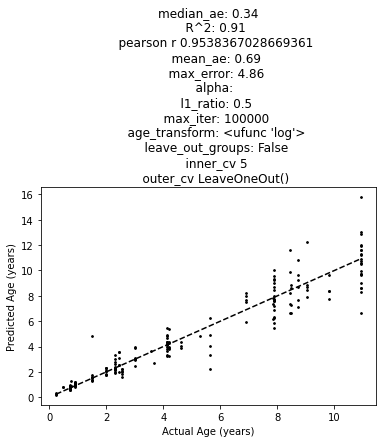

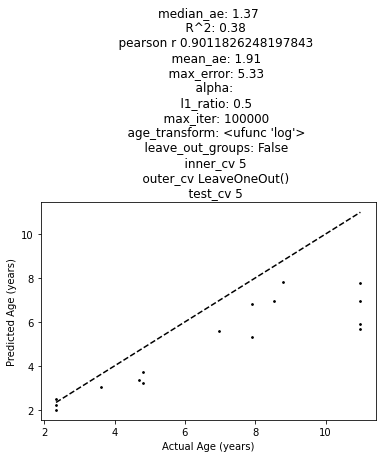

In [3]:
predictions_loo_log, predictions_loo_log_test, lm_loo_log, test_lm_loo_log = utils.clock(ad100.to_df(), ages_cpg_sorted, 
                                                                                        df_testset, ages_testset, 
                                                                                        transform=np.log, inv_transform=np.exp, 
                                                                                        L1R=0.5, MAX_ITER=100000)

X_train.shape (192, 6183) y_train.shape (192,)
X_train_adapted.shape (192, 5938) y_train_adapted.shape (192,)
X_test.shape (16, 5938) y_test.shape (16,)


34it [15:27, 27.27s/it]


[-0.43718243  0.26224422 -1.65603065  1.74429798  0.95122433 -0.90675926
  0.15287209 -0.23836994 -0.86051846  0.18287182 -0.37303638 -0.03222752
  0.47860813  0.02431679  0.68214321  0.59017754 -0.39018536 -0.58163166
  0.50233936 -0.77735233  0.22135448  0.15564728 -0.19155121 -0.06921482
  3.70328999  3.69653893  3.94717598  2.84010363  2.07011986  1.14429665
  1.99544859  1.89926529  3.06392622  3.10722208  1.45227432  2.00970745
  4.10893726  1.11883068  1.10553741  0.93942451  1.08564377  1.08255577
  1.39320183  1.56321144  4.13458872  4.05760717  3.71862078  3.59162617
  3.66748476  3.78747272  4.52598906  3.86055756  3.12541485  3.42902565
  3.13237953  3.12269211  3.58184624  4.22885609  3.41828346  4.34264374
  3.55751038  3.20446777  4.5025301   4.73375416  2.74815845  3.07649803
  5.07080126  3.50539303  5.66722393  4.22823524  4.47237301  5.19971609
  1.58451843  1.15763569  1.87170887  1.73174763  1.99780369  3.3097477
  3.22660351  3.39398956  3.81305456  2.45053864  2.

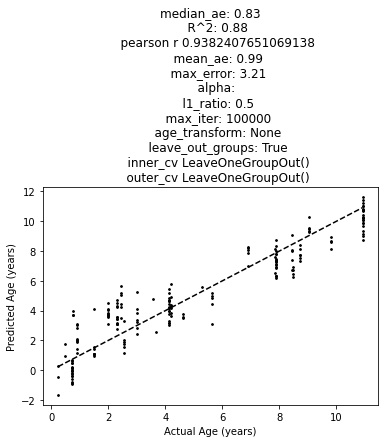

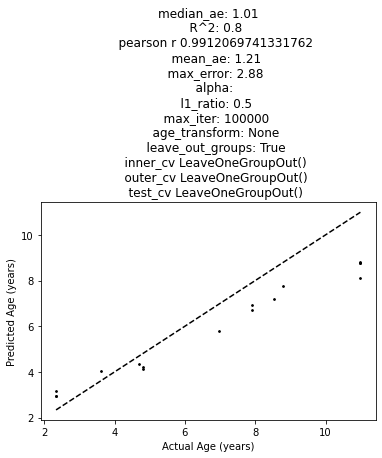

In [4]:
predictions_loto, predictions_loto_test, lm_loto, test_lm_loto = utils.clock(ad100.to_df(), ages_cpg_sorted, 
                                                                            df_testset, ages_testset, groups=groups, 
                                                                            L1R=0.5, MAX_ITER=100000)

X_train.shape (192, 6183) y_train.shape (192,)
X_train_adapted.shape (192, 5938) y_train_adapted.shape (192,)
X_test.shape (16, 5938) y_test.shape (16,)


34it [17:18, 30.55s/it]


[-0.99418998 -0.81726432 -1.28282523  0.13216186  0.06533742 -0.4799273
 -0.06431127 -0.2588098  -0.52831483 -0.25275922 -0.4560976  -0.25346112
 -0.17002583 -0.39441466  0.01562285 -0.16480231 -0.32729006 -0.49045491
 -0.06745076 -0.32313395 -0.04109693 -0.2313745  -0.45098734 -0.23341703
  0.26146841  0.27074575  0.51244164  0.42382622  0.49126172  0.27258873
  0.36392236  0.42885995  0.67578363  0.534374    0.19540858  0.52016234
  1.18251681  0.1620965   0.27170277  0.14416599  0.28671336  0.07469893
  0.23598719  0.39460182  1.03236198  1.00451279  0.80912137  0.80221105
  0.79127288  0.91600204  0.97281361  0.92599607  0.71060395  1.05392051
  0.9134655   0.81780052  1.05153871  1.15131712  1.03863478  1.37164569
  1.00474715  0.98004436  1.27769995  1.21308684  0.99295712  0.91495085
  1.29981017  1.12512732  1.48787689  1.16537189  1.30864286  1.51378894
  0.36483788  0.23128843  0.39913726  0.29508996  0.45551991  0.52297568
  1.17646265  1.12729645  1.35278201  0.98799229  1.

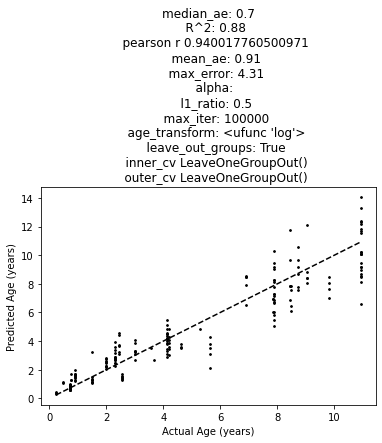

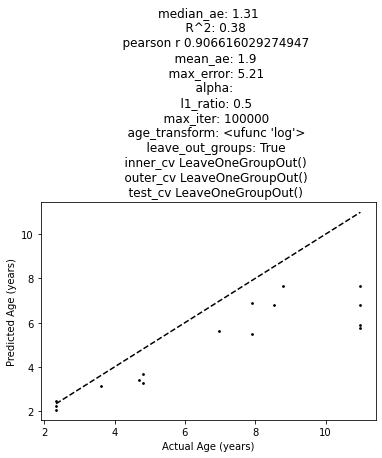

In [5]:
predictions_loto_log, predictions_loto_log_test, lm, test_lm = utils.clock(ad100.to_df(), ages_cpg_sorted, 
                                                                df_testset, ages_testset, groups=groups, 
                                                                transform=np.log, inv_transform=np.exp, 
                                                                L1R=0.5, MAX_ITER=100000)

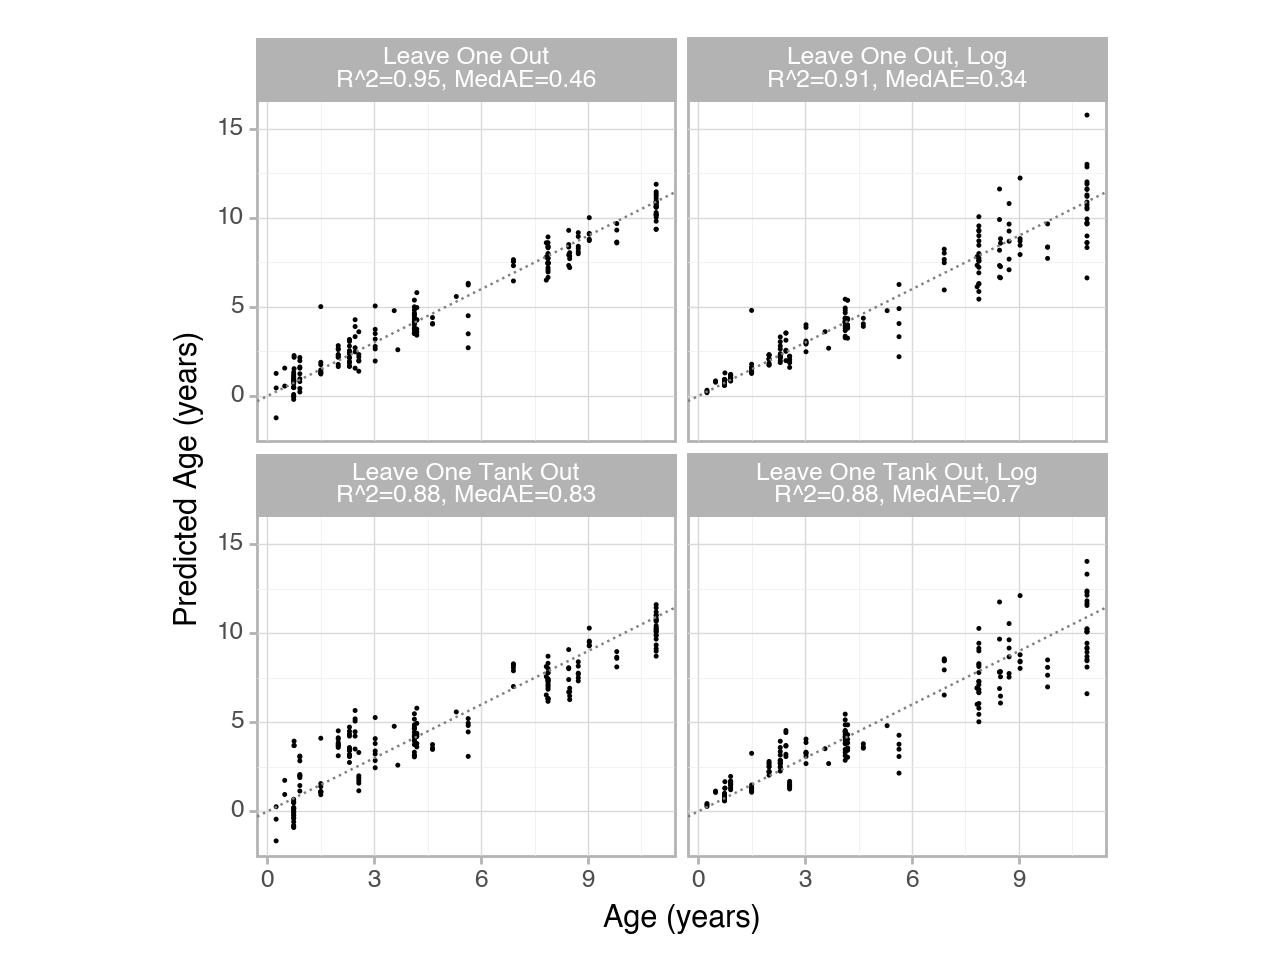

In [ ]:
# Figure 2
loo = pd.DataFrame({'Age (years)': ages_cpg_sorted, 'Predicted Age (years)': predictions_loo, 'Method': 'Leave One Out', 'Facet': f"Leave One Out\nR^2={0.95}, MedAE={0.46}"})
loo_log = pd.DataFrame({'Age (years)': ages_cpg_sorted, 'Predicted Age (years)': predictions_loo_log, 'Method': 'Leave One Out, Log', 'Facet': f"Leave One Out, Log\nR^2={0.91}, MedAE={0.34}"})
loto = pd.DataFrame({'Age (years)': ages_cpg_sorted, 'Predicted Age (years)': predictions_loto, 'Method': 'Leave One Tank Out', 'Facet': f"Leave One Tank Out\nR^2={0.88}, MedAE={0.83}"})
loto_log = pd.DataFrame({'Age (years)': ages_cpg_sorted, 'Predicted Age (years)': predictions_loto_log, 'Method': 'Leave One Tank Out, Log', 'Facet': f"Leave One Tank Out, Log\nR^2={0.88}, MedAE={0.70}"})
# test_loto = pd.DataFrame({'Age (years)': ages_testset, 'Predicted Age (years)': predictions_loto_log_test, 'Method': 'Test Set LOTO', 'Facet': f"Test Set LOTO\nR^2={0.8}, MedAE={0.96}"})
# test_loto_log = pd.DataFrame({'Age (years)': ages_testset, 'Predicted Age (years)': predictions_loto_log_test, 'Method': 'Test Set LOTO Log', 'Facet': f"Test Set LOTO Log\nR^2={0.41}, MedAE={1.26}"})

combined_df = pd.concat([loo, loo_log, loto, loto_log])

def clock_plot(combined_df, nrow, ncol):
    plot = (
        ggplot(combined_df, aes(x='Age (years)', y='Predicted Age (years)'))
        + geom_point(size=0.01) 
        + geom_abline(slope=1, intercept=0, linetype="dotted", color="grey")  # y=x line
        + facet_wrap('~Facet', nrow=nrow, ncol=ncol)
        + theme_light()
        + coord_fixed(ratio=0.5)
    )
    print(plot)

clock_plot(combined_df, 2,2)

In [ ]:
# Supplementary table 4. Print the final clock coefficients.

# Information about the LOTO clock trained on all the training data
shared_names = [name for name in ad100.to_df().index if name in set(df_testset.index)]
assert(len(shared_names) == len(test_lm_loto.coef_))

actual_coefs = [(i,x) for(i,x) in enumerate(test_lm_loto.coef_) if x != 0. and x != -0.]
print(len(actual_coefs), ' total nonzero coefficients')
print(len([x for x in actual_coefs if x[1] > 0.]), ' positive coefficients')
print(len([x for x in actual_coefs if x[1] < 0.]), ' total coefficients')

print(test_lm_loto.intercept_)
for i,x in enumerate(actual_coefs):
    print(f"{shared_names[i].split(':')[0]}\t{shared_names[i].split(':')[1]}\t{x}")

In [ ]:
# Recreating test set predictions using the clock weights in supplementary table 4
from xtropicalis_clock import XTropicalisClock
clock = XTropicalisClock("SupplementaryData4.tsv")
display(df_testset)
predicted_ages = clock.predict(df_testset)
predicted_ages

,134_XT,137_XT,138_XT,10_XT,26_XT,14_XT,16_XT,61_XT,100_XT,108_XT,30_XT,38_XT,40_XT,43_XT,44_XT,59_XT
Unnamed: 0,,,,,,,,,,,,,,,,
Chr1:1127880,0.899094,0.923264,0.933249,0.943005,0.924051,0.931959,0.949438,0.935401,0.931777,0.946708,0.919315,0.971545,0.969171,0.955513,0.942605,0.944175
Chr1:1127887,0.925354,0.938628,0.934919,0.934932,0.942446,0.922607,0.953184,0.946292,0.967972,0.950388,0.939614,0.955645,0.965318,0.963391,0.942982,0.961631
Chr1:1127904,0.927555,0.940171,0.943038,0.955631,0.942134,0.954451,0.957009,0.961039,0.973262,0.956250,0.949275,0.971774,0.971042,0.968932,0.946667,0.961446
Chr1:1128038,0.948052,0.957983,0.972727,0.954023,0.981818,0.940299,0.964706,0.975000,0.926316,0.937500,0.934426,0.972973,0.974026,0.941176,0.945205,0.967742
Chr1:1128047,0.920635,0.959596,0.979798,0.971014,0.968421,0.980769,0.967213,0.945946,0.950000,0.985915,0.981481,1.000000,0.985507,1.000000,0.965517,0.903846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chr9:91141813,0.904110,0.953125,0.898551,0.948718,0.866667,0.916667,0.950000,0.939394,0.960784,0.940000,1.000000,1.000000,0.965517,0.920635,1.000000,0.944444
Chr9:91141836,0.813333,0.954545,0.875000,0.950000,1.000000,0.880000,0.800000,0.818182,0.897959,0.826923,0.931034,1.000000,0.950000,0.893939,0.967742,0.837838
Chr9:91141847,0.866667,0.895522,0.890411,0.926829,1.000000,0.880000,0.947368,0.909091,0.920000,0.903846,0.827586,0.900000,0.933333,0.923077,0.967742,0.888889


array([2.92936795, 2.93868478, 3.17152558, 4.06183961, 4.32834521,
       4.12203081, 4.22818017, 5.79719329, 6.93986868, 6.70850409,
       7.17533385, 7.74351201, 8.75716597, 8.10768339, 8.7764487 ,
       8.80206167])

In [ ]:
# Group CV with same group sizes as tanks but all frog --> tank assignments randomized
# Non-log-transformed clock
tanksize_groups = np.array(ad100.var['Tank']).copy()
predictions_loto_shuf_list = []
loto_shuf_medae_list = []
for _ in range(5):
    np.random.shuffle(tanksize_groups)
    predictions_loto_shuf, predictions_loto_shuf_test, lm_loto_shuf, test_lm_loto_shuf = utils.clock(ad100.to_df(), ages_cpg_sorted, df_testset, ages_testset, groups=tanksize_groups, L1R=0.5, MAX_ITER=100000)
    print('preds: ', predictions_loto_shuf)
    predictions_loto_shuf_list.append(predictions_loto_shuf)
    medae = sklearn.metrics.median_absolute_error(predictions_loto_shuf, ages_cpg_sorted)
    print('medae: ', medae)
    loto_shuf_medae_list.append(medae)

print('avg medae: ', np.mean(loto_shuf_medae_list))    

In [ ]:
# Group CV with same group sizes as tanks but all frog --> tank assignments randomized
# log-transformed clock
tanksize_groups = np.array(ad100.var['Tank']).copy()
predictions_loto_log_shuf_list = []
loto_log_shuf_medae_list = []
for _ in range(5):
    np.random.shuffle(tanksize_groups)
    predictions_loto_shuf_log, predictions_loto_log_shuf_test, lm_shuf_log, test_shuf_log_lm = utils.clock(ad100.to_df(), ages_cpg_sorted, df_testset, ages_testset, groups=tanksize_groups, transform=np.log, inv_transform=np.exp, L1R=0.5, MAX_ITER=100000)
    print('preds: ', predictions_loto_shuf_log)
    predictions_loto_log_shuf_list.append(predictions_loto_shuf_log)
    medae = sklearn.metrics.median_absolute_error(predictions_loto_shuf_log, ages_cpg_sorted)
    print('medae: ', medae)
    loto_log_shuf_medae_list.append(medae)

print('avg medae: ', np.mean(loto_log_shuf_medae_list))    